##Predicting NBA Player Salary

> **Authors**
- Carmen(Jiawen) Xu (40307688)
- Ic Zhang (24130197)

## Introduction
We focus on exploring the correlations between NBA player salary data and actual on-court performance(ranked), height, weight and age. We are using the stats from the 2019/2020 regular season on the official NBA Stats site as one of the data sources. Moreover, NBA salary data will be extracted from HoopsHype and Espn. HoopsHype contains player payroll data up to the 2024/25 seasons and we will only need parts of the data and extract the dataset into a pandas Dataframe. We have our data upload to Github.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model #replicate the figure ourselves

## Linking NBA Salary With Performance

In [3]:
# import the dataframe of the salary of each nba player in 2019/20
salary = pd.read_csv('https://raw.githubusercontent.com/carmenxu/NBA_players_performance_salary_relevance/main/salary.csv')
salary.head(10)

,Unnamed: 0,Player,2019/20,2019/20(*)
0,1,Stephen Curry,"$40,231,758","$40,231,758"
1,2,Russell Westbrook,"$38,506,482","$38,506,482"
2,2,Chris Paul,"$38,506,482","$38,506,482"
3,4,James Harden,"$38,199,000","$38,199,000"
4,4,John Wall,"$38,199,000","$38,199,000"
5,6,LeBron James,"$37,436,858","$37,436,858"
6,7,Kevin Durant,"$37,199,000","$37,199,000"
7,8,Blake Griffin,"$34,449,964","$34,449,964"
8,9,Kyle Lowry,"$33,296,296","$33,296,296"
9,10,Paul George,"$33,005,556","$33,005,556"


In [4]:
# import the game points, ranking, age of each NBA player 
player_total = pd.read_csv('https://raw.githubusercontent.com/carmenxu/NBA_player_total/main/convertcsv.csv')
player_total.head(10)



,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,1680,283,478,.592,1,3,.333,282,475,.594,.593,117,201,.582,207,376,583,146,51,67,94,122,684
1,2,Bam Adebayo,PF,22,MIA,72,72,2417,440,790,.557,2,14,.143,438,776,.564,.558,264,382,.691,176,559,735,368,82,93,204,182,1146
2,3,LaMarcus Aldridge,C,34,SAS,53,53,1754,391,793,.493,61,157,.389,330,636,.519,.532,158,191,.827,103,289,392,129,36,87,74,128,1001
3,4,Kyle Alexander,C,23,MIA,2,0,13,1,2,.500,0,0,NaN,1,2,.500,.500,0,0,NaN,2,1,3,0,0,0,1,1,2
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,591,98,266,.368,46,133,.346,52,133,.391,.455,25,37,.676,9,75,84,89,17,8,54,57,267
5,6,Grayson Allen,SG,24,MEM,38,0,718,117,251,.466,57,141,.404,60,110,.545,.580,39,45,.867,8,77,85,52,10,2,33,53,330
6,7,Jarrett Allen,C,21,BRK,70,64,1852,302,465,.649,0,6,.000,302,459,.658,.649,171,270,.633,216,455,671,110,40,92,77,162,775
7,8,Kadeem Allen,PG,27,NYK,10,0,117,19,44,.432,5,16,.313,14,28,.500,.489,7,11,.636,2,7,9,21,5,2,8,7,50
8,9,Al-Farouq Aminu,PF,29,ORL,18,2,380,25,86,.291,9,36,.250,16,50,.320,.343,19,29,.655,24,63,87,21,18,8,17,27,78
9,10,Justin Anderson,SG,26,BRK,10,1,107,10,38,.263,6,29,.207,4,9,.444,.342,2,4,.500,1,20,21,8,0,6,4,13,28


In [5]:
# combine two data frames into one
df = pd.merge(salary,player_total,on = 'Player', how='left')
df.drop('2019/20(*)',axis=1,inplace=True)
df.head(10)


,Unnamed: 0,Player,2019/20,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Stephen Curry,"$40,231,758",121,PG,31,GSW,5,5,139,33,82,.402,12,49,.245,21,33,.636,.476,26,26,1.000,4,22,26,33,5,2,16,11,104
1,2,Russell Westbrook,"$38,506,482",506,PG,31,HOU,57,57,2049,604,1281,.472,55,213,.258,549,1068,.514,.493,290,380,.763,100,351,451,401,93,20,255,200,1553
2,2,Chris Paul,"$38,506,482",396,PG,34,OKC,70,70,2208,434,887,.489,111,304,.365,323,583,.554,.552,253,279,.907,26,323,349,472,111,11,161,158,1232
3,4,James Harden,"$38,199,000",198,SG,30,HOU,68,68,2483,672,1514,.444,299,843,.355,373,671,.556,.543,692,800,.865,70,376,446,512,125,60,308,227,2335
4,4,John Wall,"$38,199,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,LeBron James,"$37,436,858",250,PG,35,LAL,67,67,2316,643,1303,.493,148,425,.348,495,878,.564,.550,264,381,.693,66,459,525,684,78,36,261,118,1698
6,7,Kevin Durant,"$37,199,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Blake Griffin,"$34,449,964",190,PF,30,DET,18,18,512,88,250,.352,27,111,.243,61,139,.439,.406,76,98,.776,17,67,84,59,7,7,40,27,279
8,9,Kyle Lowry,"$33,296,296",303,PG,33,TOR,58,58,2098,334,803,.416,164,466,.352,170,337,.504,.518,294,343,.857,32,260,292,433,82,26,178,190,1126
9,10,Paul George,"$33,005,556",172,SG,29,LAC,48,48,1419,343,782,.439,157,381,.412,186,401,.464,.539,190,217,.876,24,248,272,185,68,20,125,113,1033


In [6]:
df['2019/20'].describe()

count         623
unique        326
top       $79,568
freq           56
Name: 2019/20, dtype: object

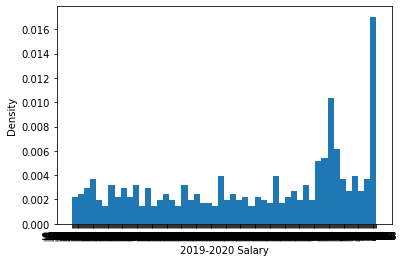

In [7]:
plt.hist(df['2019/20'],density=True,bins=50)

plt.xlabel('2019-2020 Salary')
plt.ylabel('Density')
plt.show()

# Salary and Ranked

In [8]:
# create a new table, and only keep the columns we need
ndf=df[['2019/20','Rk']]
ndf

,2019/20,Rk
0,"$40,231,758",121
1,"$38,506,482",506
2,"$38,506,482",396
3,"$38,199,000",198
4,"$38,199,000",NaN
...,...,...
618,"$79,568",504
619,"$79,568",61
620,"$79,568",523
621,"$79,568",319


In [9]:
# drop the rows with 'NaN'
ndf = ndf.dropna()
print(ndf)

         2019/20   Rk
0    $40,231,758  121
1    $38,506,482  506
2    $38,506,482  396
3    $38,199,000  198
5    $37,436,858  250
..           ...  ...
618      $79,568  504
619      $79,568   61
620      $79,568  523
621      $79,568  319
622      $65,978  366

[553 rows x 2 columns]


As we can see from the table above, the salaries with ranks are listed in order from the greatest to the smallest. For example, the player ranked 121 has a payroll of `$`40231758. However, the player who ranked 61 has only `$`79568 in payroll and his salary ranked 619 among 553 players. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Text(0.5, 0, '2019/20 Salary')

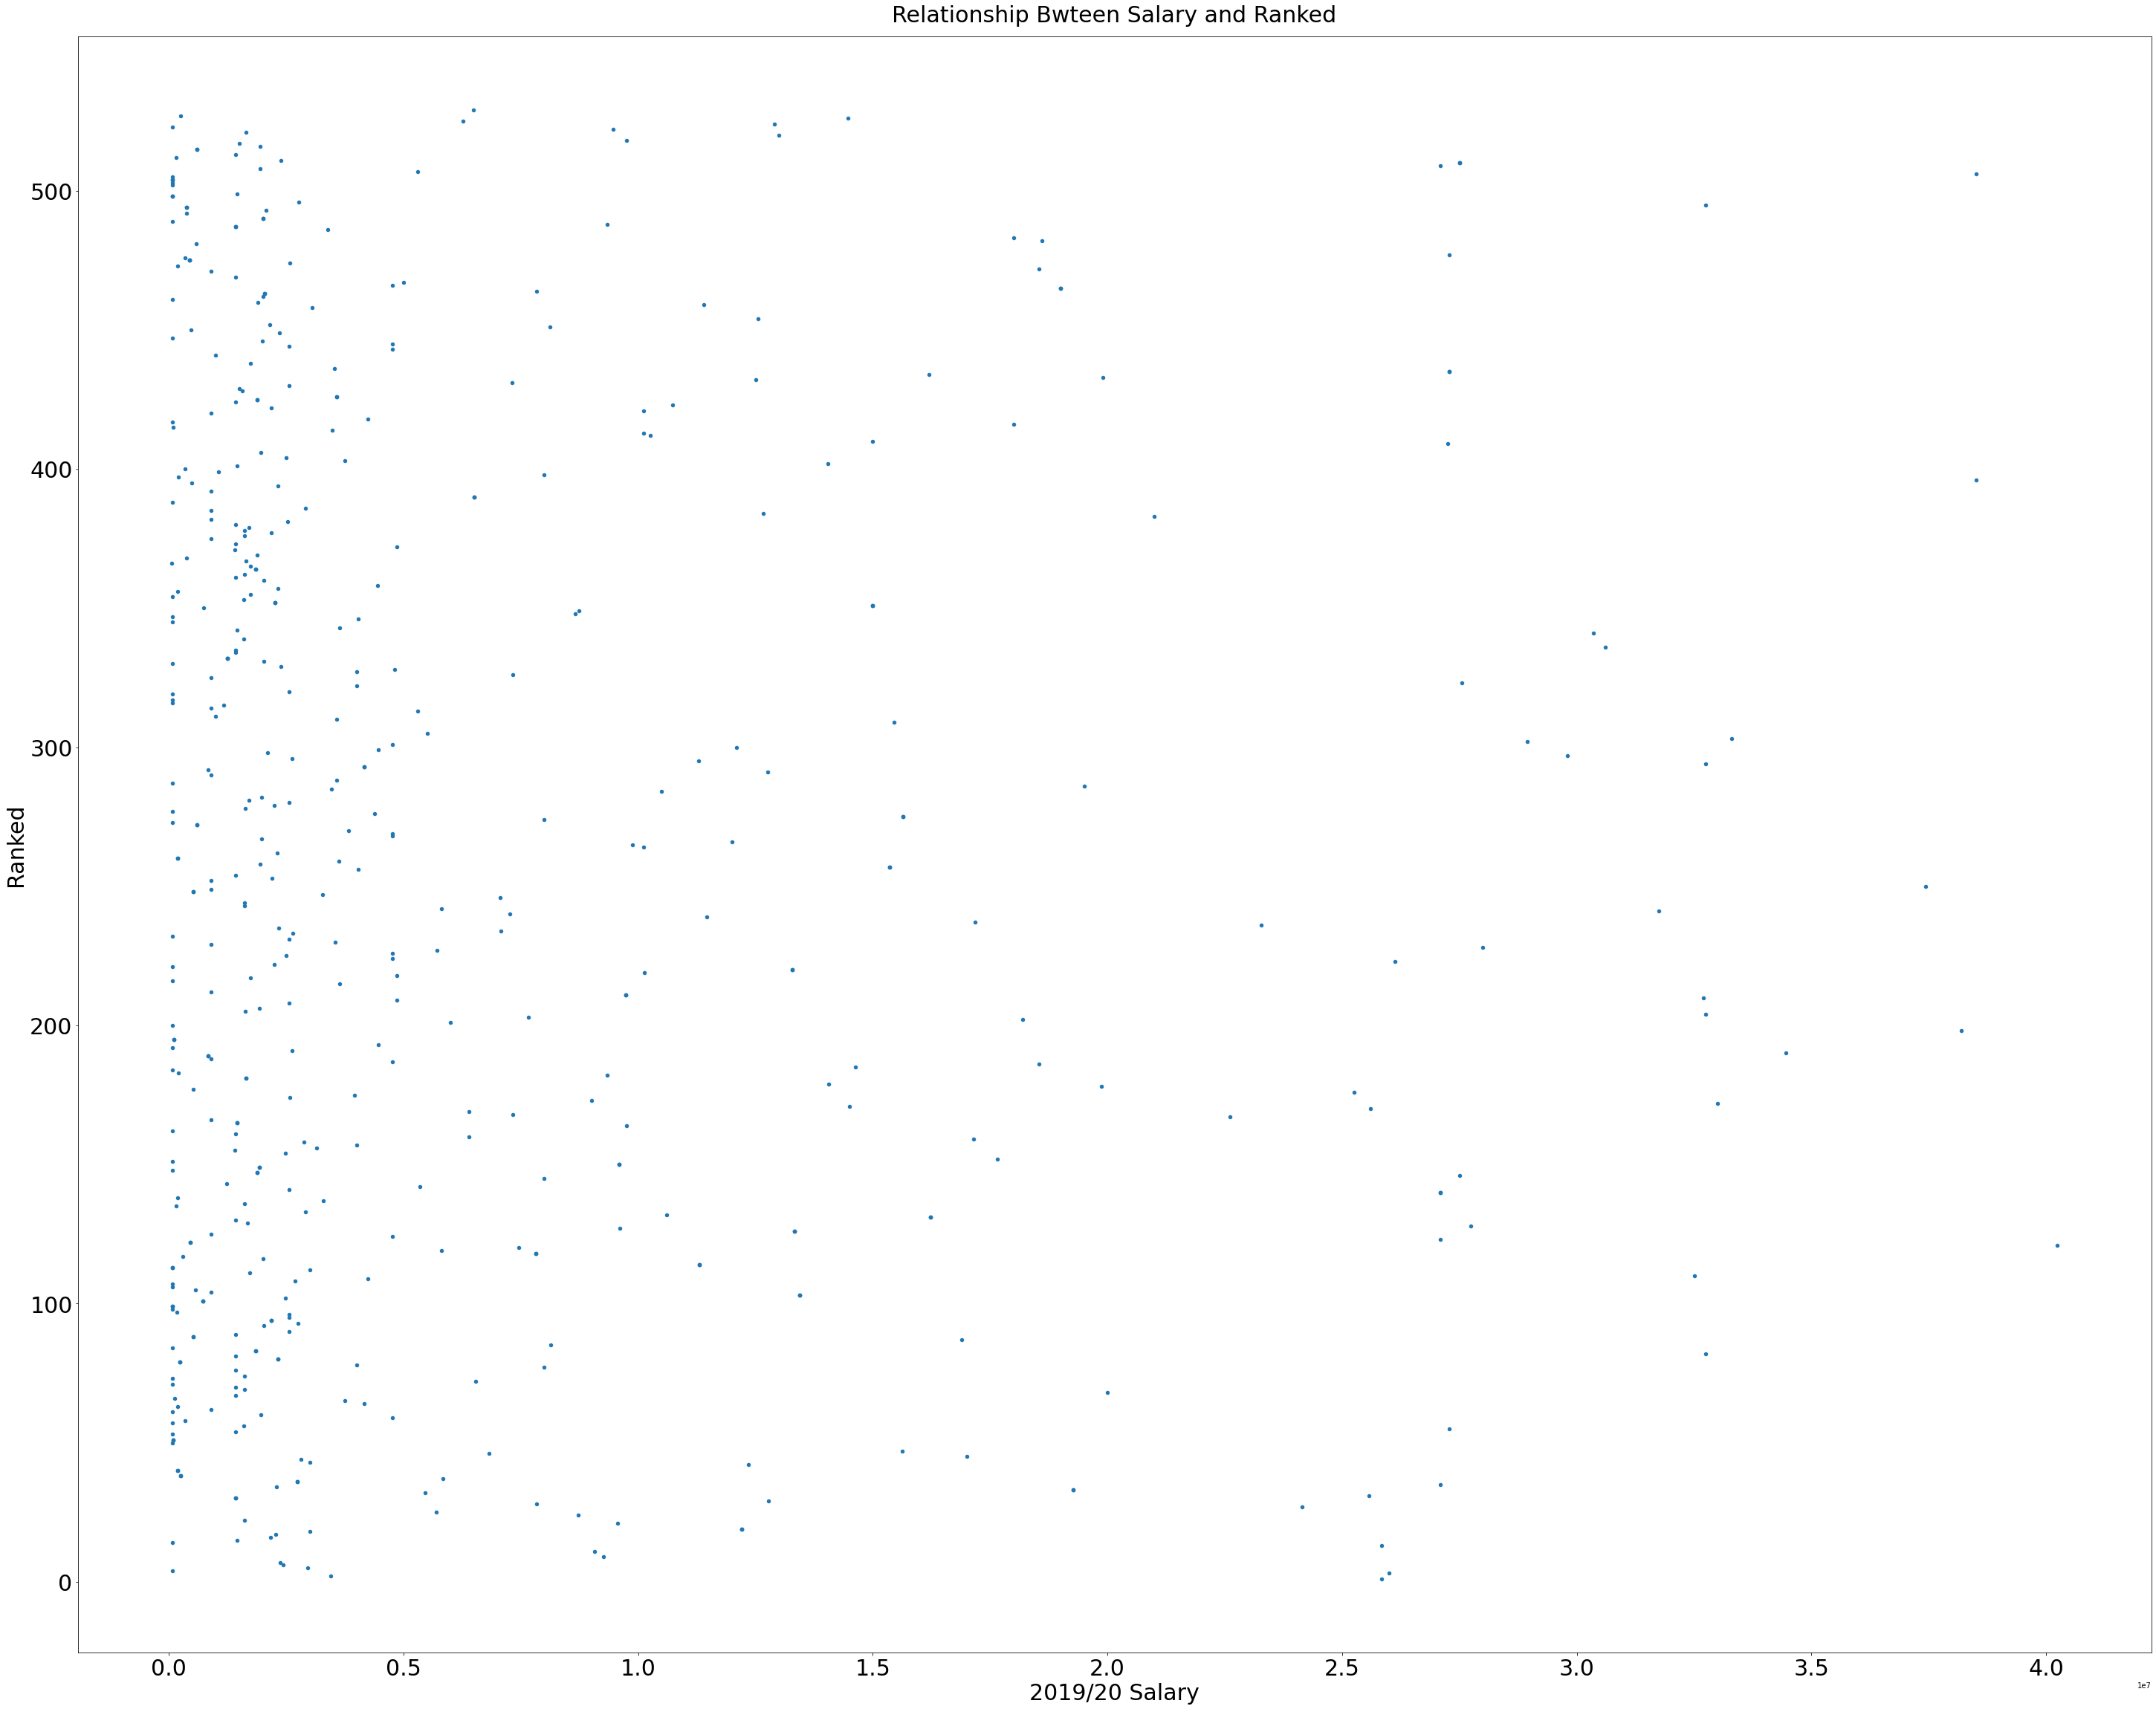

In [10]:
if(ndf['2019/20'].dtype != np.float64 and ndf['2019/20'].dtype != np.int64):
  ndf['2019/20'] = ndf['2019/20'].str.replace('$', '')
  ndf['2019/20'] = ndf['2019/20'].str.replace(',', '')
  ndf['2019/20'] = ndf['2019/20'].astype(int)

ndf['Rk'] = ndf['Rk'].astype(int)
ax=ndf.plot(kind='scatter', x="2019/20", y="Rk",figsize=(50,40),fontsize=30)
ax.set_title('Relationship Bwteen Salary and Ranked',pad=20, fontdict={'fontsize':30})
ax.set_ylabel('Ranked',fontdict={'fontsize':30})
ax.set_xlabel('2019/20 Salary',fontdict={'fontsize':30})

In [11]:
import scipy.stats

print('The correlation between Ranking and Salary of NBA players: ',scipy.stats.pearsonr(ndf['Rk'],ndf['2019/20'])[0] )


The correlation between Ranking and Salary of NBA players:  -0.023505310753021664


Moreover, we plotted the scatter plot with salaries on x-axis and rank numbers on y-axis. We can see that there is no correlation between ranking and salary of NBA players. The data points are spread out, which means there is no trend to the data. So that we are not going to do the linear regression model on ranking and salary. The correlation between Ranking and Salary is close to 0, which means it is weak linear association between Ranking and Salary.

There could be many factors behind this conclusion. The ranked is according to the 2019/20 season ranking. However, the salary could be also linking to the past on-court performances. A NBA player has a high income with a low ranking might due to his inactivity in this season. 

# Salary and Age

In [12]:
# Create a new table with age and salary only. And Dropping the row with 'NAN'
age_salary_df=df[['2019/20','Age']]
age_salary_df = age_salary_df.dropna()
age_salary_df

,2019/20,Age
0,"$40,231,758",31
1,"$38,506,482",31
2,"$38,506,482",34
3,"$38,199,000",30
5,"$37,436,858",35
...,...,...
618,"$79,568",25
619,"$79,568",23
620,"$79,568",22
621,"$79,568",23


In [13]:
if(age_salary_df['2019/20'].dtype != np.float64 and age_salary_df['2019/20'].dtype != np.int64):
  age_salary_df['2019/20'] = age_salary_df['2019/20'].str.replace('$', '')
  age_salary_df['2019/20'] = age_salary_df['2019/20'].str.replace(',', '')
  age_salary_df['2019/20'] = age_salary_df['2019/20'].astype(int)
age_salary_df
age_salary_df['Age'] = age_salary_df['Age'].astype(int)
age_salary_df

,2019/20,Age
0,40231758,31
1,38506482,31
2,38506482,34
3,38199000,30
5,37436858,35
...,...,...
618,79568,25
619,79568,23
620,79568,22
621,79568,23


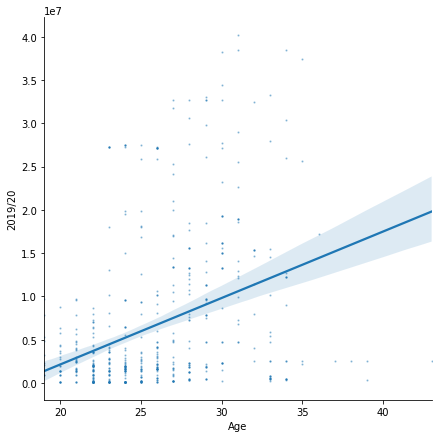

In [14]:
# draw the optimal linear regression line through the data
sns.lmplot(
    data=age_salary_df, x="Age", y="2019/20", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
)

In [15]:
X = age_salary_df.drop(["2019/20"], axis=1).copy()
# convert everything to be a float for later on
for col in list(X):
    X[col] = X[col].astype(float)
X.head()



,Age
0,31.0
1,31.0
2,34.0
3,30.0
5,35.0


In [16]:
# notice the log here!
y = np.log(age_salary_df["2019/20"])
# notice the log here!
y = age_salary_df["log_salary"] = y
y.head()

0    17.510167
1    17.466337
2    17.466337
3    17.458320
5    17.438166
Name: 2019/20, dtype: float64

In [17]:
# let's fit the model
# construct the model instance
sqft_lr_model = linear_model.LinearRegression()

# fit the model
sqft_lr_model.fit(X[["Age"]], y)

# print the coefficients
beta_0 = sqft_lr_model.intercept_
beta_1 = sqft_lr_model.coef_[0]

print(f"Fit model: log(Salary) = {beta_0:.4f} + {beta_1:.4f} Age")

Fit model: log(Salary) = 11.0594 + 0.1392 Age


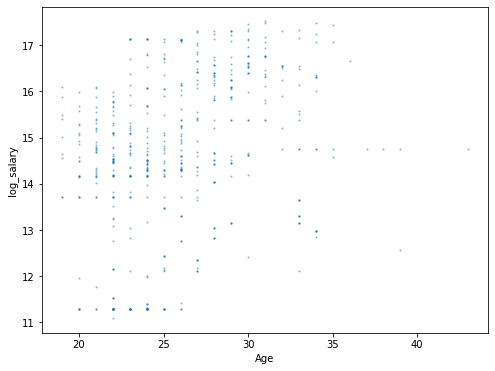

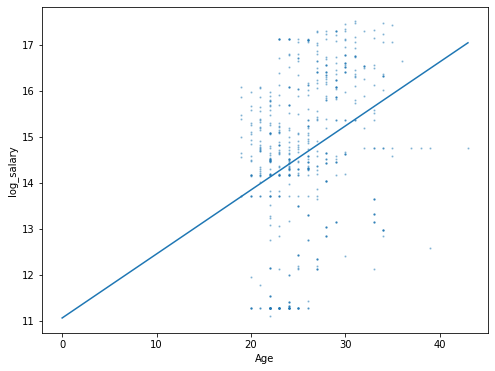

In [18]:
def var_scatter(age_salary_df, ax=None, var="Age"):
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    age_salary_df.plot.scatter(x=var , y="log_salary", alpha=0.35, s=1.5, ax=ax)

    return ax

var_scatter(age_salary_df);
# Then, we construct the plot.
ax = var_scatter(age_salary_df)

# points for the line
x = np.array([0, age_salary_df["Age"].max()])
ax.plot(x, beta_0 + beta_1*x)

In [19]:
age_salary_df.drop('log_salary',axis=1,inplace=True)
age_salary_df['AgeGroup']=np.zeros(len(age_salary_df))
print(f'The yougest NBA player is', age_salary_df['Age'].min(),'yeaers old, and the oldest NBA player is', age_salary_df['Age'].max(),'years old.')
for i in range(0,len(age_salary_df)):
  if age_salary_df.iloc[i]['Age'] >= 19 and age_salary_df.iloc[i]['Age'] < 25:
    age_salary_df.iat[i, 2] = '1'
  if age_salary_df.iloc[i]['Age'] >= 25 and age_salary_df.iloc[i]['Age'] < 30:
    age_salary_df.iat[i, 2] = 2
  if age_salary_df.iloc[i]['Age'] >= 30 and age_salary_df.iloc[i]['Age'] < 35:
    age_salary_df.iat[i, 2] = 3
  if age_salary_df.iloc[i]['Age'] >= 35 and age_salary_df.iloc[i]['Age'] < 40:
    age_salary_df.iat[i, 2] = 4
  if age_salary_df.iloc[i]['Age'] >= 40 and age_salary_df.iloc[i]['Age'] < 45:
    age_salary_df.iat[i, 2] = 5
age_salary_df

The yougest NBA player is 19 yeaers old, and the oldest NBA player is 43 years old.


,2019/20,Age,AgeGroup
0,40231758,31,3.0
1,38506482,31,3.0
2,38506482,34,3.0
3,38199000,30,3.0
5,37436858,35,4.0
...,...,...,...
618,79568,25,2.0
619,79568,23,1.0
620,79568,22,1.0
621,79568,23,1.0


In [20]:
grouped = age_salary_df.groupby('AgeGroup')

grouped['2019/20'].agg(np.mean)

AgeGroup
1.0    3.388959e+06
2.0    7.632170e+06
3.0    1.271502e+07
4.0    1.032507e+07
5.0    2.564753e+06
Name: 2019/20, dtype: float64

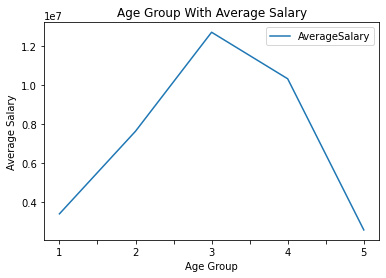

In [21]:
df2 = pd.DataFrame({'AgeGroup':['1','2','3','4','5'],
                    'AverageSalary':[grouped['2019/20'].agg(np.mean)[1],grouped['2019/20'].agg(np.mean)[2],
                                     grouped['2019/20'].agg(np.mean)[3],grouped['2019/20'].agg(np.mean)[4],grouped['2019/20'].agg(np.mean)[5]]})
df2.plot(x='AgeGroup',y='AverageSalary',title='Age Group With Average Salary',xlabel='Age Group',ylabel='Average Salary')

As we cann see from the plot above, age group 3 has the highest average salary. Age group 3 is reprensenting the ages of NBA players who are in range 30 years old to 35 years old. The youngest player and the oldest player have the lowest salary in average. 

# Multiple Regression

>   combine the height and weight data to the salary data frame





In [22]:
da = pd.read_csv('https://raw.githubusercontent.com/zhangqc00/NBA-data/main/all_seasons.csv')
da = da.rename(columns = {"player_name":"Player"})

df01 = pd.merge(salary,da,on = 'Player', how='left')
df01.drop('Unnamed: 0_y',axis=1,inplace=True)
df01.drop('2019/20(*)',axis=1,inplace=True)

df02 = df01.loc[df01['season'] == '2019-20']
df02.drop(['season','country','draft_year','draft_round','draft_number'],axis=1,inplace=True)
df02.head()



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Unnamed: 0_x,Player,2019/20,team_abbreviation,age,player_height,player_weight,college,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
10,1,Stephen Curry,"$40,231,758",GSW,31.0,190.50,83.91452,Davidson,5.0,20.8,5.2,6.6,-15.3,0.023,0.162,0.286,0.557,0.355
22,2,Russell Westbrook,"$38,506,482",HOU,31.0,190.50,90.71840,UCLA,51.0,27.5,8.1,7.0,4.2,0.045,0.159,0.330,0.536,0.339
37,2,Chris Paul,"$38,506,482",OKC,34.0,185.42,79.37860,Wake Forest,62.0,17.5,4.9,6.8,6.7,0.011,0.142,0.224,0.609,0.318
48,4,James Harden,"$38,199,000",HOU,30.0,195.58,99.79024,Arizona State,59.0,34.5,6.4,7.4,6.2,0.026,0.132,0.358,0.616,0.355
74,6,LeBron James,"$37,436,858",LAL,35.0,205.74,113.39800,None,58.0,25.6,7.8,10.7,10.4,0.028,0.186,0.308,0.581,0.480


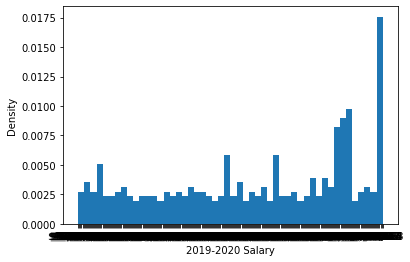

In [23]:
plt.hist(df02['2019/20'],density=True,bins=50)

plt.xlabel('2019-2020 Salary')
plt.ylabel('Density')
plt.show()

> Cheking for Linearity
*   Salary (dependent variable) and Height (Independent variable)
*   Salary (dependent variable) and Weight (Independent variable)

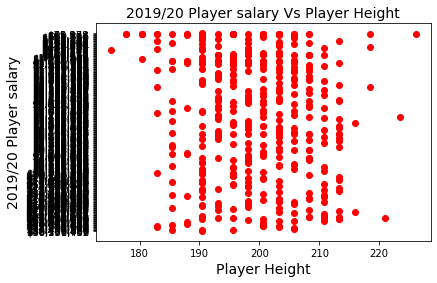

<Figure size 3600x720 with 0 Axes>

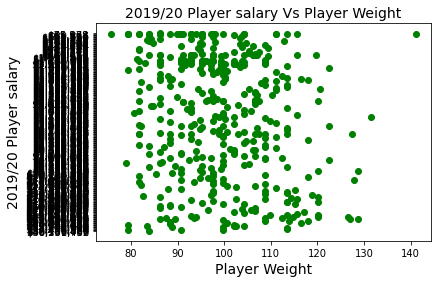

<Figure size 3600x720 with 0 Axes>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
  
plt.scatter(df02['player_height'], df02['2019/20'], color='red')
plt.title('2019/20 Player salary Vs Player Height', fontsize=14)
plt.xlabel('Player Height', fontsize=14)
plt.ylabel('2019/20 Player salary', fontsize=14)
plt.figure(figsize=(50,10))
plt.show()

plt.scatter(df02['player_weight'], df02['2019/20'], color='green')
plt.title('2019/20 Player salary Vs Player Weight', fontsize=14)
plt.xlabel('Player Weight', fontsize=14)
plt.ylabel('2019/20 Player salary', fontsize=14)
plt.figure(figsize=(50,10))
plt.show()

There is not linear relationship between the Player salary and height or weight. It is kind of random spread out.

> Performing the Multiple Linear Regression
*   Salary (dependent variable) and Height, Weight (Independent variable)


In [25]:
df03 = df02[['2019/20','player_height','player_weight']]
df03 = df03.dropna()

if(df03['2019/20'].dtype != np.float64 and df03['2019/20'].dtype != np.int64):
  df03['2019/20'] = df03['2019/20'].str.replace('$', '')
  df03['2019/20'] = df03['2019/20'].str.replace(',', '')
  df03['2019/20'] = df03['2019/20'].astype(int)
df03['2019/20'] = np.log(df03["2019/20"])


mul_model = linear_model.LinearRegression()
mul_model.fit(df03[["player_height","player_weight"]], df03['2019/20'])

beta_03 = mul_model.intercept_
beta_13 = mul_model.coef_[0]
beta_23 = mul_model.coef_[1]

print(f"Fit model: log(Salary) = {beta_03:.4f} + {beta_13:.4f} player_height + {beta_23:.4f} player_weight")

Fit model: log(Salary) = 11.9792 + -0.0012 player_height + 0.0309 player_weight


Fixed the player's height, one unit increasing in palyer weight will increase 100`*`0.0309 percent (since log level regression) change in the Salary. Fixed the player's weight, one unit increasing in player height will decrease 100`*`0.0012 percent (since log level regression) change in the Salary. Since we have to know the accuracy of the multiple regression model, we then check the mean square error.

In [26]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

y, X = df03['2019/20'], df03.drop('2019/20', axis=1)
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regr = MLPRegressor(random_state=0, 
                    hidden_layer_sizes = (64, 64, 64, 120),
                    alpha=0.001,
                    solver='lbfgs',
                    learning_rate='invscaling', learning_rate_init=1e-5,
                    max_iter=10000).fit(X_train, y_train)
y_predict = regr.predict(X_test)
print('Mean squared error: ', np.sqrt(mean_squared_error(y_test, y_predict)))
print('Score: ', regr.score(X_test, y_test))


fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_predict))), y=y_predict,
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_test,
                         mode='lines',
                         name='True value'))

fig.show()

Mean squared error:  1.8125139589159958
Score:  -0.13100353516593977


From the figure, we notice that the predicted value form the multiple regression is quite different from the true value.

> Multiple regression model by adding age

In [27]:
df04 = df02[['2019/20','player_height','player_weight','age']]
df04 = df04.dropna()

if(df04['2019/20'].dtype != np.float64 and df04['2019/20'].dtype != np.int64):
  df04['2019/20'] = df04['2019/20'].str.replace('$', '')
  df04['2019/20'] = df04['2019/20'].str.replace(',', '')
  df04['2019/20'] = df04['2019/20'].astype(int)
df04['2019/20'] = np.log(df04["2019/20"])


mul_model = linear_model.LinearRegression()
mul_model.fit(df04[["player_height","player_weight","age"]], df04['2019/20'])

beta_04 = mul_model.intercept_
beta_14 = mul_model.coef_[0]
beta_24 = mul_model.coef_[1]
beta_34 = mul_model.coef_[2]
print(f"Fit model: log(Salary) = {beta_04:.4f} + {beta_14:.4f} player_height + {beta_24:.4f} player_weight + {beta_34:.4f} age" )

Fit model: log(Salary) = 6.8997 + 0.0117 player_height + 0.0154 player_weight + 0.1580 age


In [28]:
y1, X1 = df04['2019/20'], df04.drop('2019/20', axis=1)
X1 = preprocessing.normalize(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
regr = MLPRegressor(random_state=0, 
                    hidden_layer_sizes = (64, 64, 64, 120),
                    alpha=0.001,
                    solver='lbfgs',
                    learning_rate='invscaling', learning_rate_init=1e-5,
                    max_iter=10000).fit(X1_train, y1_train)
y1_predict = regr.predict(X1_test)
print('Mean squared error: ', np.sqrt(mean_squared_error(y1_test, y1_predict)))
print('Score: ', regr.score(X1_test, y1_test))

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=list(range(len(y1_predict))), y=y1_predict,
                         mode='lines',
                         name='Prediction'))
fig1.add_trace(go.Scatter(x=list(range(len(y1_test))), y=y1_test,
                         mode='lines',
                         name='True value'))

fig1.show()

Mean squared error:  1.5417234682113414
Score:  0.18169687602998796


Comaring to the model without adding age, the mean square error decrease from 1.8125 to 1.5417, which means the model fits better with adding age as the regressor. However, we still motice that our model cannot fit the data at some point. We then add the dummy variables (team) as a regressor.

> Mutiple regession by adding dummy variable (Team Abbreviation)

In [29]:
encoded = pd.get_dummies(df02["team_abbreviation"])
#df05.drop('team_abbreviation',axis=1,inplace=True)

df05 = pd.concat([df04,encoded],axis=1)
df05.head()

,2019/20,player_height,player_weight,age,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
10,17.510167,190.50,83.91452,31.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,17.466337,190.50,90.71840,31.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,17.466337,185.42,79.37860,34.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
48,17.458320,195.58,99.79024,30.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74,17.438166,205.74,113.39800,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
y2, X2 = df05['2019/20'], df05.drop('2019/20', axis=1)
X2 = preprocessing.normalize(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
regr = MLPRegressor(random_state=0, 
                    hidden_layer_sizes = (64, 64, 64, 120),
                    alpha=0.001,
                    solver='lbfgs',
                    learning_rate='invscaling', learning_rate_init=1e-5,
                    max_iter=10000).fit(X2_train, y2_train)
y2_predict = regr.predict(X2_test)
print('Mean squared error: ', np.sqrt(mean_squared_error(y2_test, y2_predict)))
print('Score: ', regr.score(X2_test, y2_test))

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=list(range(len(y2_predict))), y=y2_predict,
                         mode='lines',
                         name='Prediction'))
fig2.add_trace(go.Scatter(x=list(range(len(y2_test))), y=y2_test,
                         mode='lines',
                         name='True value'))

fig2.show()

Mean squared error:  1.5618208636029793
Score:  0.16022356707729746


We notice that the mean square error doesn't change too much and the figue shows that the predicting model doesn't fit the true value well. The team abbreviation may not be the determinant of the salary. Thus, it may still exist omitted varible bias. We then add the Ranking data to the data frame.

In [31]:
df06 = pd.merge(player_total,df02,on = 'Player', how='left')
df06 = df06.dropna()
df07 = df06[['2019/20','player_height','age','Rk']]
df07.head()

,2019/20,player_height,age,Rk
0,"$25,842,697",210.82,26.0,1
1,"$3,454,080",205.74,22.0,2
2,"$26,000,000",210.82,34.0,3
4,"$2,964,840",195.58,21.0,5
5,"$2,429,400",193.04,24.0,6


In [32]:
if(df07['2019/20'].dtype != np.float64 and df07['2019/20'].dtype != np.int64):
  df07['2019/20'] = df07['2019/20'].str.replace('$', '')
  df07['2019/20'] = df07['2019/20'].str.replace(',', '')
  df07['2019/20'] = df07['2019/20'].astype(int)
df07['2019/20'] = np.log(df07["2019/20"])


mul_model = linear_model.LinearRegression()
mul_model.fit(df07[["player_height","age","Rk"]], df07['2019/20'])

beta_05 = mul_model.intercept_
beta_15 = mul_model.coef_[0]
beta_25 = mul_model.coef_[1]
beta_35 = mul_model.coef_[2]
#beta_45 = mul_model.coef_[3]
print(f"Fit model: log(Salary) = {beta_05:.4f} + {beta_15:.4f} player_height + {beta_25:.4f} age+ {beta_35:.4f} Rk" )

Fit model: log(Salary) = 6.5897 + 0.0256 player_height + 0.1255 age+ -0.0004 Rk


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [33]:
y3, X3 = df07['2019/20'], df07.drop('2019/20', axis=1)
X3 = preprocessing.normalize(X3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)
regr = MLPRegressor(random_state=0, 
                    hidden_layer_sizes = (64, 64, 64, 120),
                    alpha=0.001,
                    solver='lbfgs',
                    learning_rate='invscaling', learning_rate_init=1e-5,
                    max_iter=10000).fit(X3_train, y3_train)
y3_predict = regr.predict(X3_test)
print('Mean squared error: ', np.sqrt(mean_squared_error(y3_test, y3_predict)))
print('Score: ', regr.score(X3_test, y3_test))

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=list(range(len(y3_predict))), y=y3_predict,
                         mode='lines',
                         name='Prediction'))
fig3.add_trace(go.Scatter(x=list(range(len(y3_test))), y=y3_test,
                         mode='lines',
                         name='True value'))

fig3.show()

Mean squared error:  1.5724220424984319
Score:  -0.05633627772591443


We consider height and weight may exists perfect multicollinearity, which means these two variables have very close linear relationshp.
Although the mean sqaured error is larger than last model, we notice the predicted line fits the true value better. We will continune on the omitted variables later on...